In [71]:
import nltk
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

### Basic Sentence Tokenization

In [39]:
text = 'NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes.'

In [40]:
token_sent = sent_tokenize(text)
print(token_sent)

['NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time.', 'There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences.', 'But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes.']


### Basic Word Tokenization

In [41]:
token_word = word_tokenize(text)
print(token_word)

['NLP', 'drives', 'computer', 'programs', 'that', 'translate', 'text', 'from', 'one', 'language', 'to', 'another', ',', 'respond', 'to', 'spoken', 'commands', ',', 'and', 'summarize', 'large', 'volumes', 'of', 'text', 'rapidly—even', 'in', 'real', 'time', '.', 'There', '’', 's', 'a', 'good', 'chance', 'you', '’', 've', 'interacted', 'with', 'NLP', 'in', 'the', 'form', 'of', 'voice-operated', 'GPS', 'systems', ',', 'digital', 'assistants', ',', 'speech-to-text', 'dictation', 'software', ',', 'customer', 'service', 'chatbots', ',', 'and', 'other', 'consumer', 'conveniences', '.', 'But', 'NLP', 'also', 'plays', 'a', 'growing', 'role', 'in', 'enterprise', 'solutions', 'that', 'help', 'streamline', 'business', 'operations', ',', 'increase', 'employee', 'productivity', ',', 'and', 'simplify', 'mission-critical', 'business', 'processes', '.']


### Stopwords Removal

In [42]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
token_sw = [words for words in token_word if not words in stopwords_list]

In [44]:
print(token_sw)

['NLP', 'drives', 'computer', 'programs', 'translate', 'text', 'one', 'language', 'another', ',', 'respond', 'spoken', 'commands', ',', 'summarize', 'large', 'volumes', 'text', 'rapidly—even', 'real', 'time', '.', 'There', '’', 'good', 'chance', '’', 'interacted', 'NLP', 'form', 'voice-operated', 'GPS', 'systems', ',', 'digital', 'assistants', ',', 'speech-to-text', 'dictation', 'software', ',', 'customer', 'service', 'chatbots', ',', 'consumer', 'conveniences', '.', 'But', 'NLP', 'also', 'plays', 'growing', 'role', 'enterprise', 'solutions', 'help', 'streamline', 'business', 'operations', ',', 'increase', 'employee', 'productivity', ',', 'simplify', 'mission-critical', 'business', 'processes', '.']


### WordCloud
* The bigger the font the greater the frequency

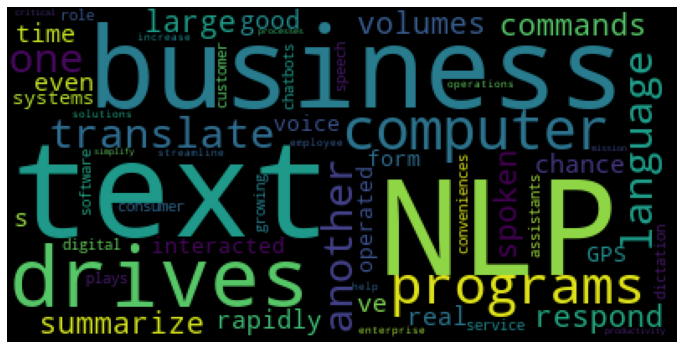

In [45]:
wcloud = WordCloud().generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wcloud)
plt.axis('off')
plt.show()

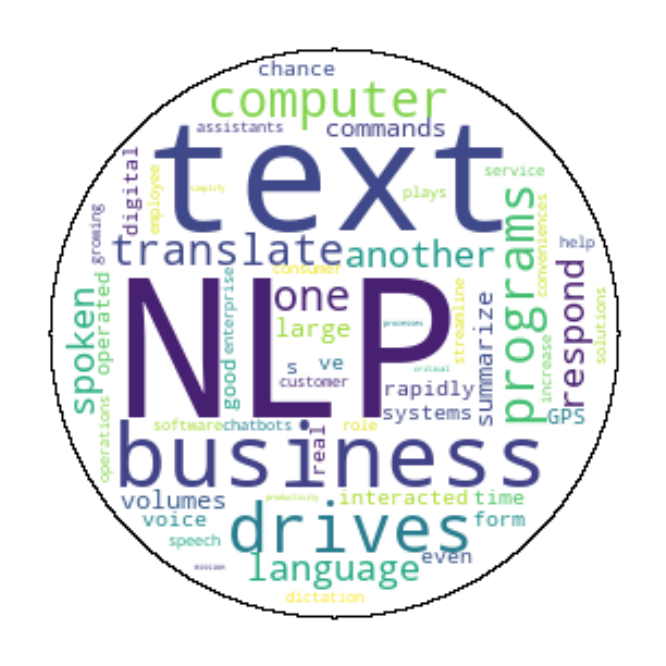

In [46]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(mask=mask, background_color="white",random_state=42,contour_width=0.1, contour_color="black")
wc.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

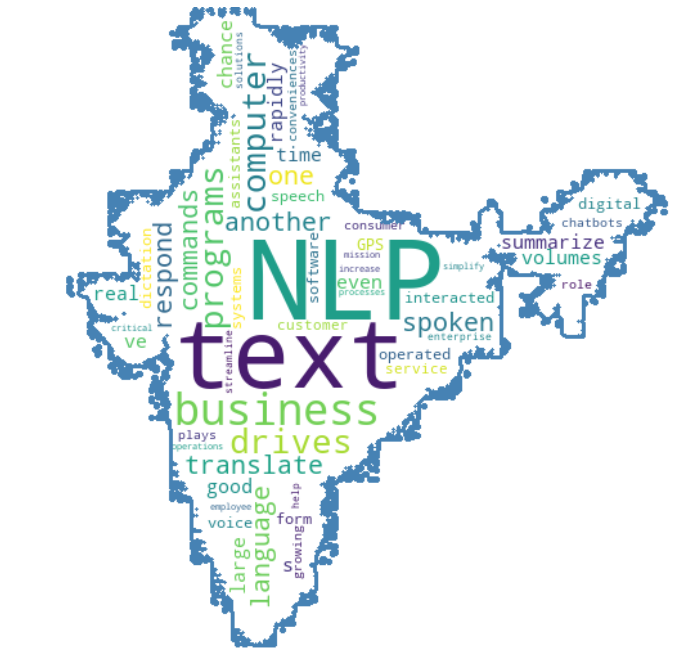

In [47]:
bottle_mask = np.array(Image.open("images/india-map.jpg"))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", mask=bottle_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wordcloud.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Frequency Distribution of words

In [48]:
fd = nltk.FreqDist(token_word)

In [49]:
fd

FreqDist({',': 8, 'NLP': 3, 'and': 3, 'in': 3, '.': 3, 'that': 2, 'text': 2, 'to': 2, 'of': 2, '’': 2, ...})

### Frequency Plot

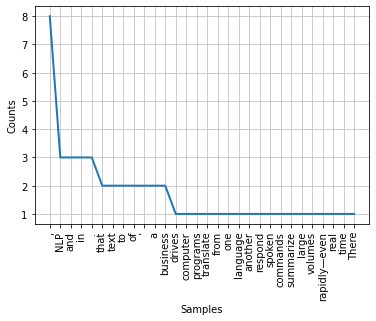

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [50]:
fd.plot(30)

### POS Tagging

In [51]:
pos = pos_tag(token_word)
print(pos)

[('NLP', 'NNP'), ('drives', 'VBZ'), ('computer', 'NN'), ('programs', 'NNS'), ('that', 'WDT'), ('translate', 'VBP'), ('text', 'NN'), ('from', 'IN'), ('one', 'CD'), ('language', 'NN'), ('to', 'TO'), ('another', 'DT'), (',', ','), ('respond', 'NN'), ('to', 'TO'), ('spoken', 'VB'), ('commands', 'NNS'), (',', ','), ('and', 'CC'), ('summarize', 'VB'), ('large', 'JJ'), ('volumes', 'NNS'), ('of', 'IN'), ('text', 'NN'), ('rapidly—even', 'NN'), ('in', 'IN'), ('real', 'JJ'), ('time', 'NN'), ('.', '.'), ('There', 'EX'), ('’', 'JJ'), ('s', 'NN'), ('a', 'DT'), ('good', 'JJ'), ('chance', 'NN'), ('you', 'PRP'), ('’', 'VBP'), ('ve', 'NNS'), ('interacted', 'VBN'), ('with', 'IN'), ('NLP', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('form', 'NN'), ('of', 'IN'), ('voice-operated', 'JJ'), ('GPS', 'NNP'), ('systems', 'NNS'), (',', ','), ('digital', 'JJ'), ('assistants', 'NNS'), (',', ','), ('speech-to-text', 'JJ'), ('dictation', 'NN'), ('software', 'NN'), (',', ','), ('customer', 'NN'), ('service', 'NN'), ('chatbo

In [52]:
tx1 = 'He is booking my flight for Jodhpur'
tx2 = 'I am going to read this book in the flight'
ptx = pos_tag(word_tokenize(tx1))
ptx2 = pos_tag(word_tokenize(tx2))
print(ptx)
print(ptx2)

[('He', 'PRP'), ('is', 'VBZ'), ('booking', 'VBG'), ('my', 'PRP$'), ('flight', 'NN'), ('for', 'IN'), ('Jodhpur', 'NNP')]
[('I', 'PRP'), ('am', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('read', 'VB'), ('this', 'DT'), ('book', 'NN'), ('in', 'IN'), ('the', 'DT'), ('flight', 'NN')]


### Lowercasing the text

In [53]:
low_text = text.lower()
sent_tok = sent_tokenize(low_text)
word_tok = word_tokenize(low_text)
print(low_text,'\n')
print(sent_tok,'\n')
print(word_tok,'\n')

nlp drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. there’s a good chance you’ve interacted with nlp in the form of voice-operated gps systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. but nlp also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes. 

['nlp drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time.', 'there’s a good chance you’ve interacted with nlp in the form of voice-operated gps systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences.', 'but nlp also plays a growing role in enterprise soluti

### Stemming 

In [65]:
stem_list1=[]
for word in word_tok:
    stm = PorterStemmer().stem(word)
    stem_list1.append(stm)

In [66]:
stem_list2=[]
for word in word_tok:
    stm = LancasterStemmer().stem(word)
    stem_list2.append(stm)

In [67]:
stem_list3=[]
for word in word_tok:
    stm =SnowballStemmer('english').stem(word)
    stem_list3.append(stm)

In [68]:
print(stem_list1[1:6])
print(stem_list2[1:6])
print(stem_list3[1:6])

['drive', 'comput', 'program', 'that', 'translat']
['driv', 'comput', 'program', 'that', 'transl']
['drive', 'comput', 'program', 'that', 'translat']


### Lemmatization

* Default POS

In [75]:
lemat_list=[]
for word in word_tok:
    lem = WordNetLemmatizer().lemmatize(word)
    lemat_list.append(lem)

In [77]:
print(word_tok[1:6])
print(lemat_list[1:6])

['drives', 'computer', 'programs', 'that', 'translate']
['drive', 'computer', 'program', 'that', 'translate']


* Custom POS

In [90]:
noun = ['NN','NNS','NNP','NNPS']
verb = ['VB','VBG','VBD','VBN','VBP','VBZ']
adj = ['JJ','JJR','JJS']
adv = ['RB','RBR','RBS']
lemat_list2=[]
postag_list = pos_tag(word_tok)
for tup in postag_list:
    word = tup[0]
    postag = tup[1]
    if postag in verb:
        pos = 'v'
    elif postag in adv:
        pos = 'r'
    elif postag in adj:
        pos = 'a'
    else :
        pos = 'n'
        
    lem = WordNetLemmatizer().lemmatize(word,pos)
    lemat_list2.append(lem)

In [93]:
print(postag_list[1:6])
print(lemat_list[1:6])
print(lemat_list2[1:6])

[('drives', 'NNS'), ('computer', 'NN'), ('programs', 'NNS'), ('that', 'WDT'), ('translate', 'VBP')]
['drive', 'computer', 'program', 'that', 'translate']
['drive', 'computer', 'program', 'that', 'translate']
